<h1>Determining whether a sample is a balloon or a kharbozeh</h1>

<img src="kharbozeh.jpg" alt="kharbozeh" width="200" height="400" >
<img src="balloon.jpg" alt="melon" >

In [1368]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [1369]:
N = 1000
std = 0.3

Balloon specifications

In [1370]:
Balloon_length = np.random.normal(4 , std , N)
Balloon_width = np.random.normal(5 , std , N)
Balloon_weight = np.random.normal(0.5 , std , N)


Kharbozeh specifications

In [1371]:
Kharbozeh_length = np.random.normal(6 , std , N)
Kharbozeh_width = np.random.normal(3, std , N)
Kharbozeh_weight = np.random.normal(2 , std , N)

In [1372]:
width = np.concatenate((Balloon_width , Kharbozeh_width))
length = np.concatenate((Balloon_length , Kharbozeh_length))
weight = np.concatenate((Balloon_weight , Kharbozeh_weight))

In [1373]:
print(width)
print(length)
print(weight)

[4.53432008 4.94083724 5.01950498 ... 2.85396373 3.14413796 3.06221105]
[4.12102337 3.86819252 4.42426644 ... 5.99795118 5.94099503 6.12262168]
[0.24522951 0.14219117 0.47877522 ... 2.17140722 1.74169154 1.87098542]


In [1374]:
print(len(width))
print(len(length))
print(len(weight))

2000
2000
2000


In [1375]:
print(type(width))
print(type(length))
print(type(weight))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [1376]:
clean = np.array([width , length , weight]).T

In [1377]:
print(clean)

[[4.53432008 4.12102337 0.24522951]
 [4.94083724 3.86819252 0.14219117]
 [5.01950498 4.42426644 0.47877522]
 ...
 [2.85396373 5.99795118 2.17140722]
 [3.14413796 5.94099503 1.74169154]
 [3.06221105 6.12262168 1.87098542]]


In [1378]:
Balloon_lable = np.zeros(N , dtype="int")
Kharbozeh_lable = np.ones(N , dtype="int")

##### kharbozeh = 1 
##### balloon = 0

In [1379]:
labels = np.concatenate((Balloon_lable , Kharbozeh_lable)).T

In [1380]:
print(labels)

[0 0 0 ... 1 1 1]


In [1381]:
labels.shape

(2000,)

In [1382]:
clean.shape

(2000, 3)

In [1383]:
labels = labels.reshape(2000 , 1)
clean = clean.reshape(2000 , 3)

In [1384]:
labels.shape

(2000, 1)

In [1385]:
clean.shape

(2000, 3)

In [1386]:
labels

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [1387]:
clean

array([[4.53432008, 4.12102337, 0.24522951],
       [4.94083724, 3.86819252, 0.14219117],
       [5.01950498, 4.42426644, 0.47877522],
       ...,
       [2.85396373, 5.99795118, 2.17140722],
       [3.14413796, 5.94099503, 1.74169154],
       [3.06221105, 6.12262168, 1.87098542]])

In [1388]:
print(np.unique(labels))
print(len(np.unique(labels)))

[0 1]
2


<function matplotlib.pyplot.show(close=None, block=None)>

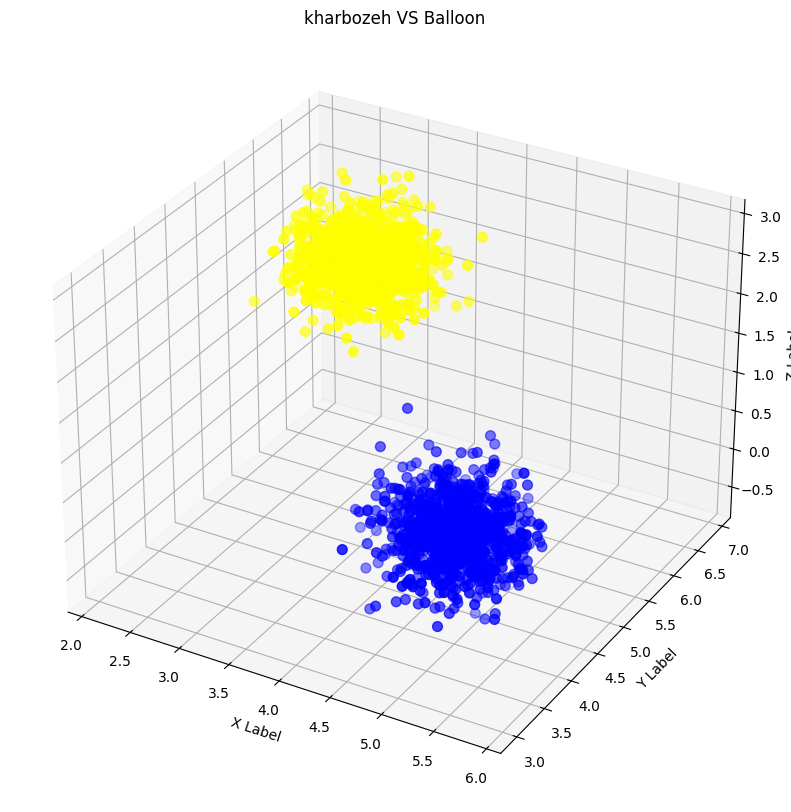

In [1389]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(clean[0:N,0] , clean[0:N,1] , clean[0:N,2] , color='blue',s=50,label='balloon')
ax.scatter(clean[N:,0] , clean[N:,1] , clean[N:,2] , color='yellow' , s=50,label='kharbozeh')

plt.title('kharbozeh VS Balloon')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# ax.legend()
# ax.view_init(elev=20 , azim=30)

plt.show

KNN

In [1390]:
class KnearestNighbors:
    def __init__(self , k):
        self.k = k

    def fit(self , clean_train , labels_train):
        self.clean_train = clean_train
        self.labels_train = labels_train
        self.number_classes = len(np.unique(labels_train))
    def nearNighbors(self,new_test):
        # 
        distances = np.sqrt(np.sum((new_test - self.clean_train)**2 , axis = 1))
        #
        sorted_indicate = np.argsort(distances)[0:self.k]
        return sorted_indicate
    def Predict(self,new_test):
        near_neighbors = self.nearNighbors(new_test)
        # print(near_neighbors)
        # print(self.labels_train[near_neighbors])
        # print(np.bincount(self.labels_train[near_neighbors]))
        labels_neighbors = self.labels_train[near_neighbors].flatten().astype(np.int64)
        counts = np.bincount(labels_neighbors)
        print("counts :",counts)
        return counts


In [1391]:
knn = KnearestNighbors(k=5)

knn.fit(clean,labels)
new_test = np.array([4.5,5,1.9])
pred = knn.Predict(new_test)
print(pred)
output = np.argmax(pred)
print(output)


counts : [4 1]
[4 1]
0


In [1392]:
# classifier = {"kharbozeh" : 1 , "Balloon" : 0 }
if output == 1:
    print("kharbozeh")
elif output == 0:
    print("Balloon")

Balloon
